# Big Data / Mustererkennung IT-Talents

Als erstes interessiert die Frage wie viele Datensätze sind in der csv-Datei denn enthalten:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns

sns.set()
sns.set(rc={'figure.figsize':(15,5)})

#map data from csv
races = pd.read_csv('races.csv', delimiter=";")
races.shape 

(166609, 12)

166609 Datensätze und 12 Spalten. 

In [2]:
races

,id,race_created,race_driven,track_id,challenger,opponent,money,fuel_consumption,winner,status,forecast,weather
0,1,06.03.2012,06.03.2012 00:00,12,5,2,30,0.63,5,finished,"a:4:{s:5:""sunny"";i:10;s:5:""rainy"";i:70;s:8:""th...",rainy
1,2,06.03.2012,06.03.2012 00:03,12,5,4,30,0.63,4,finished,"a:4:{s:5:""sunny"";i:70;s:5:""rainy"";i:15;s:8:""th...",sunny
2,3,06.03.2012,0000-00-00 00:00:00,3,10,5,30,0.63,0,declined,"a:4:{s:5:""sunny"";i:70;s:5:""rainy"";i:10;s:8:""th...",NaN
3,4,06.03.2012,06.03.2012 00:06,12,5,4,30,0.63,5,finished,"a:4:{s:5:""sunny"";i:25;s:5:""rainy"";i:75;s:8:""th...",sunny
4,5,06.03.2012,0000-00-00 00:00:00,12,4,5,30,0.63,0,declined,"a:4:{s:5:""sunny"";i:45;s:5:""rainy"";i:20;s:8:""th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
166604,166605,13.06.2017,14.06.2017 01:55,12,14470,14656,30,3.945,14470,finished,"a:4:{s:5:""sunny"";i:5;s:5:""rainy"";i:85;s:8:""thu...",rainy
166605,166606,13.06.2017,26.06.2017 20:54,12,14470,14654,30,3.945,14470,finished,"a:4:{s:5:""sunny"";i:10;s:5:""rainy"";i:40;s:8:""th...",thundery
166606,166607,15.06.2017,0000-00-00 00:00:00,3,14656,3001,30,1.095,0,waiting,"a:4:{s:5:""sunny"";i:10;s:5:""rainy"";i:5;s:8:""thu...",NaN
166607,166608,24.06.2017,24.06.2017 21:22,3,14664,2967,30,0.57,2967,finished,"a:4:{s:5:""sunny"";i:50;s:5:""rainy"";i:30;s:8:""th...",sunny


# Daten aufräumen / vorbereiten

In [3]:
def is_float(x):
    try:
        float(x)
    except ValueError:
        return False
    return True

#convert fuel_consumption to float value
races = races[races['fuel_consumption'].apply(lambda x: is_float(x))]

finished_races = races[(races.status=='finished')]

finished_races.head()

,id,race_created,race_driven,track_id,challenger,opponent,money,fuel_consumption,winner,status,forecast,weather
0,1,06.03.2012,06.03.2012 00:00,12,5,2,30,0.63,5,finished,"a:4:{s:5:""sunny"";i:10;s:5:""rainy"";i:70;s:8:""th...",rainy
1,2,06.03.2012,06.03.2012 00:03,12,5,4,30,0.63,4,finished,"a:4:{s:5:""sunny"";i:70;s:5:""rainy"";i:15;s:8:""th...",sunny
3,4,06.03.2012,06.03.2012 00:06,12,5,4,30,0.63,5,finished,"a:4:{s:5:""sunny"";i:25;s:5:""rainy"";i:75;s:8:""th...",sunny
5,6,06.03.2012,06.03.2012 00:17,12,5,10,100,0.63,5,finished,"a:4:{s:5:""sunny"";i:30;s:5:""rainy"";i:20;s:8:""th...",snowy
8,9,06.03.2012,06.03.2012 00:08,3,10,4,30,0.63,4,finished,"a:4:{s:5:""sunny"";i:45;s:5:""rainy"";i:40;s:8:""th...",sunny


In [4]:
#Clean Data with NaN
races_with_weather = finished_races[(finished_races.weather!='NaN')]
races_with_weather.head()

,id,race_created,race_driven,track_id,challenger,opponent,money,fuel_consumption,winner,status,forecast,weather
0,1,06.03.2012,06.03.2012 00:00,12,5,2,30,0.63,5,finished,"a:4:{s:5:""sunny"";i:10;s:5:""rainy"";i:70;s:8:""th...",rainy
1,2,06.03.2012,06.03.2012 00:03,12,5,4,30,0.63,4,finished,"a:4:{s:5:""sunny"";i:70;s:5:""rainy"";i:15;s:8:""th...",sunny
3,4,06.03.2012,06.03.2012 00:06,12,5,4,30,0.63,5,finished,"a:4:{s:5:""sunny"";i:25;s:5:""rainy"";i:75;s:8:""th...",sunny
5,6,06.03.2012,06.03.2012 00:17,12,5,10,100,0.63,5,finished,"a:4:{s:5:""sunny"";i:30;s:5:""rainy"";i:20;s:8:""th...",snowy
8,9,06.03.2012,06.03.2012 00:08,3,10,4,30,0.63,4,finished,"a:4:{s:5:""sunny"";i:45;s:5:""rainy"";i:40;s:8:""th...",sunny


# Fuel Consumption 

Als erstes ein Boxplot, um ein Gefühl für den Verbrauch zu bekommen. Dieser weicht teilweise extrem vom Mittelwert ab, wie der nachfolgende Plot zeigt:

<ipython-input-5-994153ebcdcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finished_races["fuel_consumption"]= pd.to_numeric(finished_races["fuel_consumption"])


[Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14')]

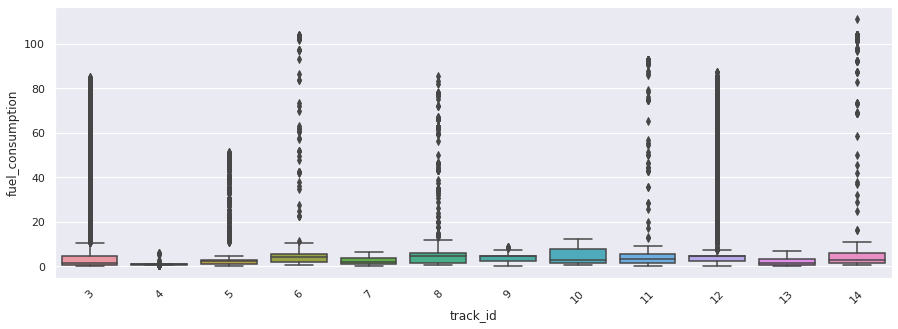

In [5]:
finished_races["fuel_consumption"]= pd.to_numeric(finished_races["fuel_consumption"])


data = pd.DataFrame({'track_id': finished_races.track_id, 'fuel_consumption': finished_races.fuel_consumption})


sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='track_id', y='fuel_consumption', data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


Zunächst aggregiere ich die Daten nach Gewinner und Track id und nehme den Durchschnittlichen Wert, den jeder Fahrer verbraucht. Anschließend gruppiere ich nach der track_id. So habe ich eine Gute Aussage darüber, wie viel Sprit auf welcher Strecker verbraucht wird. Diese Werte geben dann entweder die Länge der Strecke oder wie bergig diese sind an.

In [6]:


fuel_per_challenger = finished_races.groupby(['winner','track_id'])['fuel_consumption'].mean().reset_index().sort_values(['track_id','fuel_consumption'], ascending=[False,False])

t = fuel_per_challenger.groupby(['track_id']).mean()
t['fuel_consumption']

track_id
3      5.157131
4      0.883689
5      3.213726
6     10.940726
7      1.904013
8      9.787180
9      2.745647
10     3.011067
11     9.946572
12     7.577980
13     1.742972
14     9.981014
Name: fuel_consumption, dtype: float64

# Wann wurden die meisten Rennen gefahren?

zunächst ist zusehen, dass die Rennanzahl stark sinkt von Jahr zu Jahr

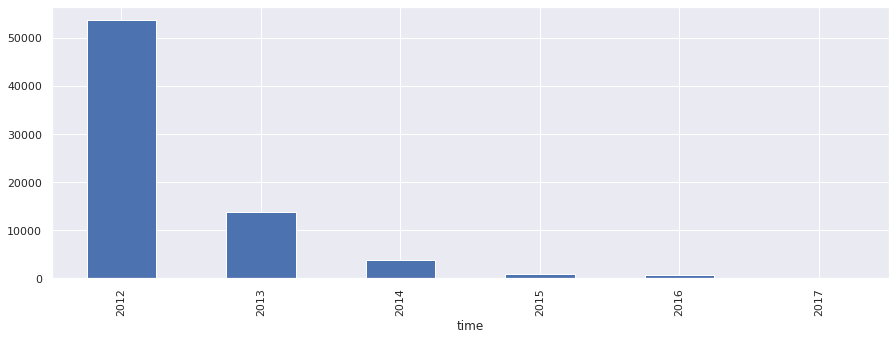

In [7]:
races_per_year = pd.DataFrame({'time': finished_races.race_created})

races_per_year['time'] =  pd.to_datetime(races_per_year['time']).dt.strftime("%Y").astype(int)

data=races_per_year.groupby(['time']).size().plot(kind='bar')

Die nächste spannende Frage beschäftigt sich damit, an welchem Wochentag die meisten rennen gefahren wurden:

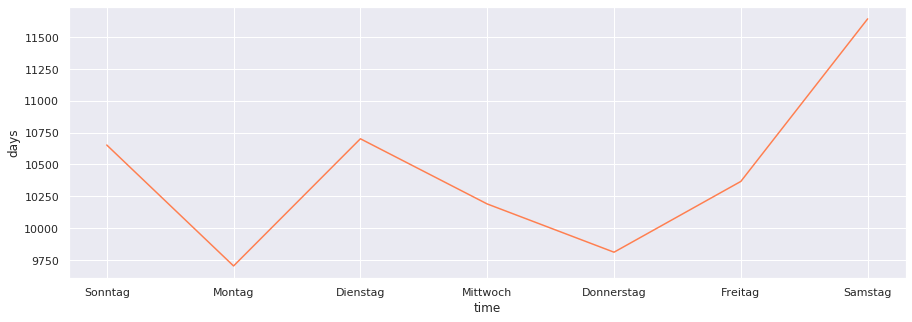

In [8]:
races_per_day = pd.DataFrame({'time': finished_races.race_created})

data = pd.DataFrame()
#Map to days
days = {0: 'Sonntag', 1: 'Montag', 2: "Dienstag", 3: "Mittwoch", 4: "Donnerstag", 5: "Freitag", 6:"Samstag"}
races_per_day['time'] =  pd.to_datetime(races_per_day['time']).dt.weekday.astype(int)

#Group by day
data['days'] = races_per_day.groupby(['time']).size()

#Map to the names 
data['time'] = data.index.map(days)

#Plot
sns.lineplot(data=data, color="coral", x='time', y='days', sort=False)

Wie in der Abbildung zu erkennen ist, sind am Wochenende mehr Rennen geafhren worden, als unter der Woche. 
Hier könnte die Vermutung angestellt werden, dass es sich um ein Computer-Spiel handelt.

# Wer ist der beste Fahrer?

zunächst: wer hat die meisten Rennen gewonnen?

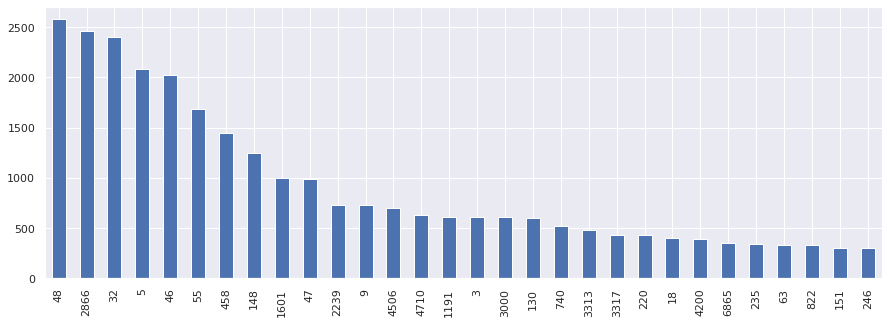

In [9]:
#use function value_counts and print the 30 first results

winner = finished_races['winner'].value_counts().sort_values(ascending = False);
winner[:30].plot(kind='bar')

Fahrer 48 geht als klarer Gewinner hervor. Allerdings wurde hier nicht betrachtet, dass dieser Fahrer auch die meisten Rennen gefahren haben könnte.

## Wer hat prozentual die meisten Rennen gewonnen?

Fahrer 48 hat zwar die meisten Rennen gewonnen, er hat aber auch die meisten gefahren. Hier wird zunächst die Anzahl der Rennen, die jeder Fahrer gefahren ist berechnet und anschließend eine Gewinn-Ratio errechnet. Es werden nur die Fahrer gezählt, die mindestens 300 Rennen gefahren sind. 

(0.5, 0.8)

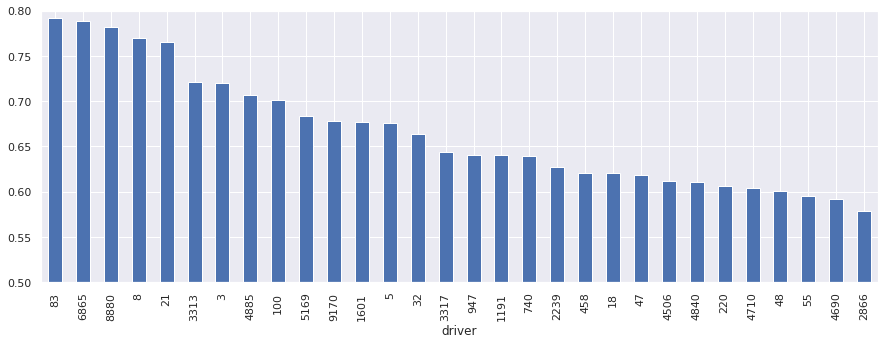

In [10]:
#create DataFrames for all categories: Challenger, Opponent and Winner
#Challenger and Opponent combined is the total races made
challenger = pd.DataFrame(finished_races.challenger.value_counts().reset_index())
challenger.columns = ['driver', 'challenger_count']
opponent = pd.DataFrame(finished_races.opponent.value_counts().reset_index())
opponent.columns = ['driver', 'opponent_count']
winner = pd.DataFrame(finished_races.winner.value_counts().reset_index())
winner.columns = ['driver', 'winner_count']


#merge all together
merged = pd.merge(pd.merge(opponent, challenger, on='driver'), winner, on ='driver')

#calculate combined(total number of races) and win_ratio per driver
merged['combined'] = merged['challenger_count'] + merged['opponent_count']
merged['win_ratio'] = merged['winner_count'] / merged['combined']

#create new DataFrame and sort by win Ratio
to_calculate=pd.DataFrame({"driver":merged.driver, "combined":merged.combined, "win_ratio":merged.win_ratio})

to_calculate = to_calculate[to_calculate.combined>300].sort_values(by=['win_ratio'], ascending=False)

to_plot= to_calculate[:30].set_index('driver')
to_plot['win_ratio'].plot(kind='bar')
plt.ylim([0.5,0.8])

Diese Ergebnisse lassen sich gut visualisieren: Im Schnitt liegt die Gewinnrate bei knapp über 50%. Dies klingt sehr realistisch für die große Anzahl an Daten. Nur wenige weichen von dem Schnitt ab.

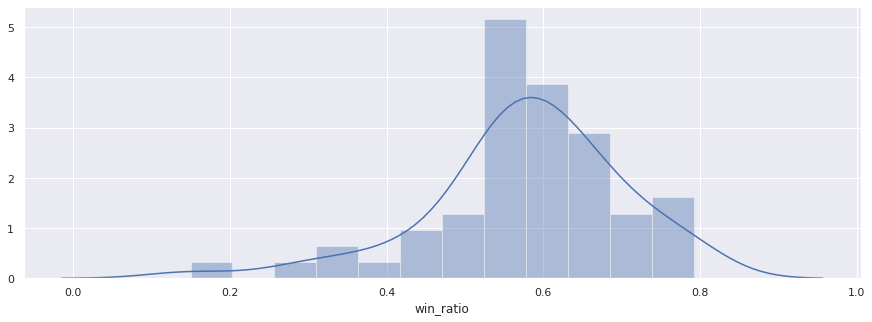

In [11]:
to_plot=pd.DataFrame({"combined":merged.combined, "winner_count":merged.winner_count})

sns.distplot(to_calculate[to_calculate.combined>300]['win_ratio'])

## Wer hat am meisten Geld verdient?

Text(0.5, 0, 'Gewinner ID')

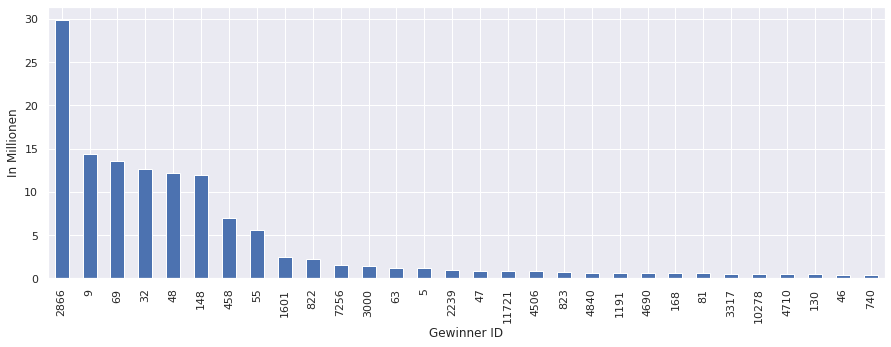

In [12]:
money_winner = finished_races.groupby(['winner']).sum().sort_values(['money'],ascending=False)
forplot = money_winner['money']/1000000
forplot[:30].plot(kind='bar')
plt.ylabel("In Millionen")
plt.xlabel("Gewinner ID")

Falls die Angaben in € oder $ gemacht wurden sind hier wohl einige Millionäre geworden. Den größten Gewinn scheint 2866 verzeichnen zu können. 

# Random Forest, für Aussagen zu künftigen Events

### Wer wird in Zukunft gut sein?

In [13]:
#prepare dataset for randomforest
test = finished_races.drop(['forecast', 'status', 'id'], axis=1)
test = test[(pd.to_datetime(test['race_created']).dt.strftime("%Y").astype(int) < 2015)]
test['race_created'] =  pd.to_datetime(test['race_created']).dt.strftime("%Y%d%m").astype(int)
test['race_driven'] = pd.to_datetime(test['race_driven']).dt.strftime("%H%M").astype(int)

#map weather for random forest
weather = {'sunny': 0, 'rainy': 1, 'snowy': 2, "thundery": 3}
test['weather'] = test['weather'].map(weather)

In [14]:
#map winner to boolean for the random forest
test['winner'] = test['winner'].map(test['challenger'] == test['winner']).fillna(False).astype(int)
test.tail()

,race_created,race_driven,track_id,challenger,opponent,money,fuel_consumption,winner,weather
162373,20142912,939,12,12953,12975,50,80.025,0,1
162376,20142912,1229,12,12953,10014,75,80.325,1,1
162377,20142912,1228,12,12953,10014,75,80.325,0,2
162386,20143012,2339,12,12953,12975,90,79.875,0,1
162392,20143012,2256,3,840,13090,30,2.265,0,1


## Welchen Einfluss haben die einzelnen Merkmale auf den Datensatz?

In [15]:
#get a features list
features = list(test.columns[:7])
features.append('weather')
features

['race_created',
 'race_driven',
 'track_id',
 'challenger',
 'opponent',
 'money',
 'fuel_consumption',
 'weather']

Als nächstes werden mit Hilfe eines ExtraTreesClassifiers die Wichtigkeit der Merkmale bestimmt:

In [16]:
y = test["winner"]
X = test[features]

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_

# Print the feature ranking
print("Feature ranking:")

x = pd.DataFrame({'Importance': importances, 'features': features})
x

Feature ranking:


,Importance,features
0,0.144712,race_created
1,0.164151,race_driven
2,0.035858,track_id
3,0.204872,challenger
4,0.198579,opponent
5,0.087192,money
6,0.126223,fuel_consumption
7,0.038413,weather


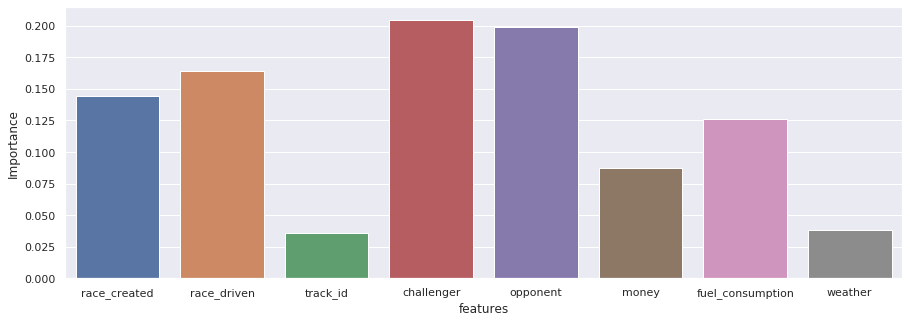

In [17]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x="features", y="Importance", data=x)


## Zeit für ein kleines Tournament!

Hier hat sich für mich die Frage ergeben, welcher Fahrer würde laut Random Forest zum aktuellen Zeitpunkt gewinnen. Dafür habe ich den 28.01.2012 um 12:30 als Merkmal verwendet. Zudem habe ich ein sonniges Wetter erwartet, für fuel_consumption = 10 und für money = 20.

Anschließend lasse ich alle Fahrer, die mehr als 300 Rennen gefahren haben gegeneinander antreten. Dies beansprucht einiges an Rechenkapazität und dauert daher etwas länger. 


In [18]:
def run_tournament(date, time, fuel_consumption, money, weather):
    df = pd.DataFrame()
    tournament_challengers = to_calculate[to_calculate.combined>300]
    indices=tournament_challengers['driver']

    #Predict the best racer
    for i in (indices):
        for j in (indices):
            for track in range(3,14):
                if(i!=j):#driver should not challenge itself
                    if(forest.predict([[date, time,track, i, j, money, fuel_consumption, weather]])):
                        df = df.append({'winner': i},  ignore_index=True)
                    else:
                        df = df.append({'winner': j}, ignore_index=True)
                    
    return df.groupby(['winner']).size().to_frame('size').reset_index().sort_values(['size'], ascending=[False])

In [19]:
tournament_winner = run_tournament(20120128,1230,10,20,0)
tournament_winner

,winner,size
39,1601.0,686
43,3313.0,647
0,3.0,633
54,5913.0,627
53,5542.0,627
45,4200.0,627
55,6865.0,627
41,2866.0,627
40,2239.0,627
18,100.0,627


Hier ist zu erkennen, dass es andere Gewinner gibt, als nach der Prozentual-Gewinn Methode. Viele scheinen allerdings ungefähr gleich gut zu sein und landen auf einem ähnlichen Platz. Der Gewinnner kann sich ein kleinwenig abheben mit 40 mehr Gewinnen als der Zweitplatzierte. Der ursprüngliche Gewinner landet nur auf dem 4. Platz, den er sich mit vielen weiteren teilt.

In mehreren Läufen, war die Platzierung gleich (bei gleichen forest). Daraus lässt sich schließen, dass das Tournament gut funktioniert.

# Wie gut sind die Vorhersagen des Random Forests?

## Daten aufteilen in test und train dataset

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.2)

X_train['Train_or_test']=1
X_test['Train_or_test']=0

concat_df = pd.concat([X_train,X_test], axis=0)

y = concat_df.pop('Train_or_test')


forest.fit(concat_df, y)


<ipython-input-20-e9447ba0be87>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Train_or_test']=1
<ipython-input-20-e9447ba0be87>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Train_or_test']=0


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=250,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [21]:
from sklearn.metrics import roc_auc_score

y_pred = forest.predict(concat_df)

roc_auc_score(y,y_pred)


0.9895373677943545

Wow. :D

## Welche "Freundesgruppen" gibt es?

### Können Cluster entdeckt werden?

Leider war es mir nicht möglich cluster zu entdecken, aber vielleicht gibt es noch welche die ich nicht gefunden habe. Nachfolgendend ein K-Means Cluster Algorithmus zum Entdecken von Clustern in Daten

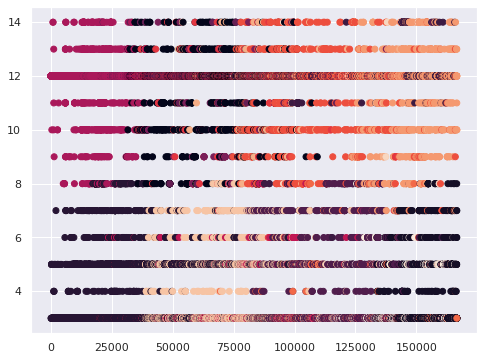

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

#data = pd.DataFrame({'time': finished_races.race_created, 'opponent': finished_races.opponent, 'challenger': finished_races.challenger})

data=finished_races

data = data.drop(['status'], axis=1)
data = data.drop(['race_driven'], axis=1)
data = data.drop(['race_created'], axis=1)
data = data.drop(['forecast'], axis=1)
data = data.drop(['weather'], axis=1)

#data['time'] =  pd.to_datetime(data['time']).dt.weekday.astype(int)

data = data.values


model = KMeans(n_clusters=20)

# Scale Data
model = model.fit(scale(data))

#Plot the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1],  c=model.labels_.astype(float))
plt.show()